In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
df=pd.read_csv("car_data.csv")

In [4]:
df.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,25,midsize car,29,4.0,2.5,fwd,gas,36,mazda,6,m,2014
1,26,midsize car,30,4.0,2.5,fwd,gas,37,mazda,6,a,2014
2,25,small sport utility vehicle,27,4.0,2.5,fwd,gas,31,mazda,cx-5 2wd,a,2014
3,26,small sport utility vehicle,29,4.0,2.0,fwd,gas,34,mazda,cx-5 2wd,m,2014
4,26,small sport utility vehicle,28,4.0,2.0,fwd,gas,32,mazda,cx-5 2wd,a,2014


In [5]:
df.shape

(550, 12)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city_mpg         550 non-null    int64  
 1   class            550 non-null    object 
 2   combination_mpg  550 non-null    int64  
 3   cylinders        548 non-null    float64
 4   displacement     548 non-null    float64
 5   drive            550 non-null    object 
 6   fuel_type        550 non-null    object 
 7   highway_mpg      550 non-null    int64  
 8   make             550 non-null    object 
 9   model            550 non-null    object 
 10  transmission     550 non-null    object 
 11  year             550 non-null    int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 51.7+ KB


In [7]:
df.isnull().sum()

city_mpg           0
class              0
combination_mpg    0
cylinders          2
displacement       2
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64

In [17]:
df['cylinders'].fillna(df['cylinders'].mean(), inplace=True)
df['displacement'].fillna(df['displacement'].mean(), inplace=True)

/var/folders/pp/24nz6zh55d76389ml_1vblsc0000gn/T/ipykernel_25747/3148614099.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['cylinders'].fillna(df['cylinders'].mean(), inplace=True)
/var/folders/pp/24nz6zh55d76389ml_1vblsc0000gn/T/ipykernel_25747/3148614099.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting

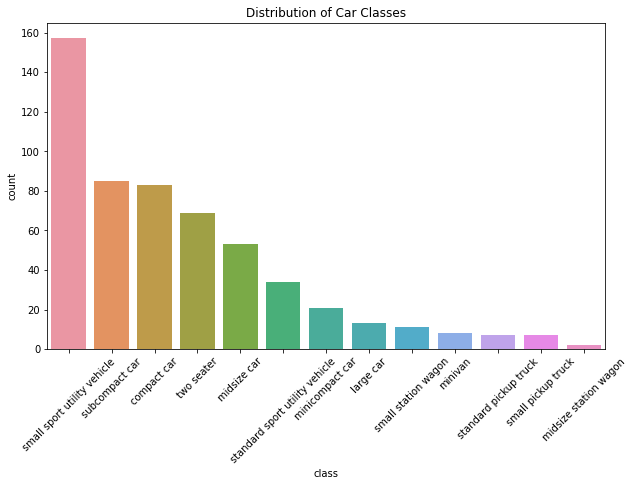

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='class', order=df['class'].value_counts().index)
plt.title('Distribution of Car Classes')
plt.xticks(rotation=45)
plt.show()

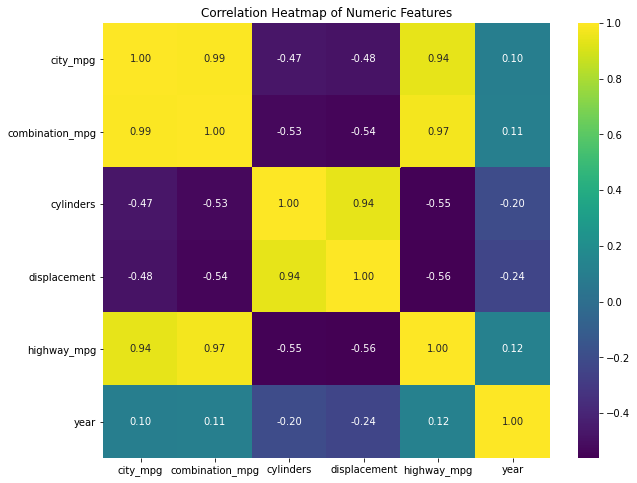

In [13]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df.drop(columns=['highway_mpg', 'make', 'model'])
X = pd.get_dummies(X, drop_first=True)
y = df['highway_mpg']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
y_pred

array([24.53470381, 27.44970726, 23.37394733, 24.28784525, 24.7715974 ,
       21.87167035, 21.00546977, 24.55305204, 32.04371473, 33.62667175,
       27.43767703, 24.83429833, 27.55309397, 18.95772279, 25.29453014,
       21.57708369, 33.57239278, 29.95751381, 25.23427907, 25.64551906,
       26.35570886, 26.39197048, 25.40295262, 40.8099639 , 21.00546977,
       33.01627925, 26.32146726, 28.35740502, 33.59014101, 27.26562841,
       27.34125783, 37.40396668, 30.03423049, 26.99160785, 24.23548806,
       24.13118655, 30.37675778, 30.35635151, 31.43838009, 31.7389832 ,
       30.69989534, 24.52421503, 27.33036352, 22.20192745, 24.30404674,
       46.50671653, 33.31948038, 25.37553757, 25.86324425, 32.08210054,
       26.35570886, 23.69989278, 27.36514354, 25.37054965, 31.23385766,
       26.35845865, 37.3796884 , 33.62099724, 21.57708369, 24.15828706,
       30.27409432, 30.9082928 , 19.7014475 , 22.39353179, 27.29414585,
       24.3370612 , 23.5848718 , 33.57239278, 23.7878312 , 21.53

In [15]:
mse = mean_squared_error(y_test, y_pred)
mse

0.7157555784218503

In [16]:
r2 = r2_score(y_test, y_pred)
r2

0.9729537484107466